<h1><center><u><b>IncomeVista Visionary</b></u></center></h1>
<h3><center>A Machine Learning Approach</center></h3>

#### <center>A broad and insightful view of income, using innovative methods for Income Prediction.</center>

- The dataset contains the income result of certain groups of people who's having the features mentioned
below
### Categorical Features
  
- workclass: It denotes the working class of the person.  
        *values: Private, Self-emp-not-inc,Self-emp-inc, Federal-gov, Local-gov, State-gov,
                Without-pay, Never-worked.*  
  
- education: It denotes the educational qualification of the person.  
        *values: Bachelors, Somecollege, 11th, HS-grad, Prof-school, Assoc-acdm,
                Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,10th, Doctorate, 5th-6th, Preschool.*  
  
- marital-status: It denotes the marital status of the person.  
        *values: Married-civ-spouse(civillian spouse),Divorced, Never-married, Separated, Widowed,
                Married-spouse-absent,Married-AF-spouse(Armed force spouse).*
  
- occupation: It denotes the occupation of a person.  
        *values: Tech-support, Craft-repair,Otherservice, Sales, Exec-managerial,
                    Prof-specialty,Handlers-cleaners, Machine-op-inspct,Adm-clerical,
                    Farming-fishing, Transport-moving, Priv-house-serv,Protective-serv, Armed-Forces.*
  
- relationship: It denotes the people present in the family.  
        *values: Wife, Own-child, Husband,Not-in-family, Other-relative, Unmarried.*
  
- race: It denotes the person’s origins.  
        *values: White, Asian-Pac-Islander, Amer-IndianEskimo,Other, Black.*
  
- sex: It denotes the person's gender.  
        *values: Female, Male.*
  
- native-country: It denotes the country to which the person belongs.

### Numerical Features
  
- capital-gain: continuous. It denotes the monitory gains by the person.
  
- capital-loss: continuous. It denotes the monitory loss by the person.
  
- hours-per-week: continuous. It denotes the number of working hours per week by the person.
  
- age: continuous. It denotes the age of the person.

- fnlwgt: Final-weight,a statistical weight assigned to each individual in the dataset to make the
        sample more representative of the entire population from which it was drawn.

- education-num: It denotes the quantitative values with reference to education.


The dataset contains a feature called Income whch represent whether the income is greater than 50,000 or less than or equal to 50,000. here we are classifiying into two groups by the Income feature which are a group with those having income >50K and <=50K. Hence the Target Feature is 'Income'

### Importing Required Libraries

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [257]:
income=pd.read_csv('incomeData.csv')
# reading the dataset

In [258]:
income

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [259]:
income.shape

(32561, 15)

In [260]:
income.duplicated().sum()

24

In [261]:
income.drop_duplicates(inplace=True)

- the data set contains 32561 rows and 15 columns

In [262]:
income.columns
# to print the columns

Index(['nan', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

##### Renaming the incorrect column 

In [263]:
income.rename(columns={'nan':'age'},inplace=True)

In [264]:
income.rename(columns={'fnlwgt':'final-weight'},inplace=True)

In [265]:
cols=income.columns
# assaigning column to a variable for easy access

In [266]:
cols

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

##### Checking the datatypes of Features/columns

In [267]:
income.dtypes

age                int64
workclass         object
final-weight       int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

#### Checking the sum of NULL values

In [268]:
income.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

- There isn't any Null values present. Does that mean the data is clean?

##### Checking the dataset information :-

In [269]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   final-weight    32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  Income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


### Handling missing Values

In [270]:
income['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

- ' ?' is the missing value, so checking all the columns to find which all the features contains
 such values

In [271]:
income['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [272]:
income['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

- come to a conclusion that only Three of the features contains the same error, therefore it need to be handled

In [273]:
income['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

- it cannot be dropped as it is in a large no. of rows instead using the forward fill methode to clean the data

In [274]:
income['occupation'].replace({" ?":np.nan},inplace=True)
# before forward fill changing the missing values to nan by replace methode

In [275]:
income['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

- thus nan replaces the missing value

In [276]:
income['occupation']=income['occupation'].ffill()
# filling the nan with forward fill

In [277]:
income['occupation'].value_counts()

 Prof-specialty       4383
 Craft-repair         4358
 Exec-managerial      4315
 Adm-clerical         3980
 Sales                3863
 Other-service        3467
 Machine-op-inspct    2132
 Transport-moving     1703
 Handlers-cleaners    1470
 Farming-fishing      1036
 Tech-support          980
 Protective-serv       683
 Priv-house-serv       157
 Armed-Forces           10
Name: occupation, dtype: int64

- there is no nan or missing value in Occupation as it is cleaned by ffill method

In [278]:
income['workclass'].replace({' ?':np.nan},inplace=True)

In [279]:
income['workclass']=income['workclass'].ffill()

In [280]:
income['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [281]:
income['native-country'].replace({' ?':np.nan},inplace=True)

In [282]:
income['native-country']=income['native-country'].ffill()

In [283]:
income['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

- also other than occupation two of the features too have the same situation which are workclass and native-country
- by handling the missing values in these features the data is cleaned

In [284]:
income.duplicated().sum()

0

- Hence The data is Clean

In [285]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   final-weight    32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  Income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [286]:
# Creating two variable which seperates numerical and categorical data 
numcols=income.select_dtypes(include=['number'])
catcols=income[['workclass','education','marital-status','occupation','relationship','race','sex','native-country']]

In [287]:
numcols

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [288]:
numcols=numcols.apply(pd.to_numeric)

In [289]:
numcols

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


## Exploratory Data Analysis

In [290]:
cols

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

<Axes: xlabel='count', ylabel='Income'>

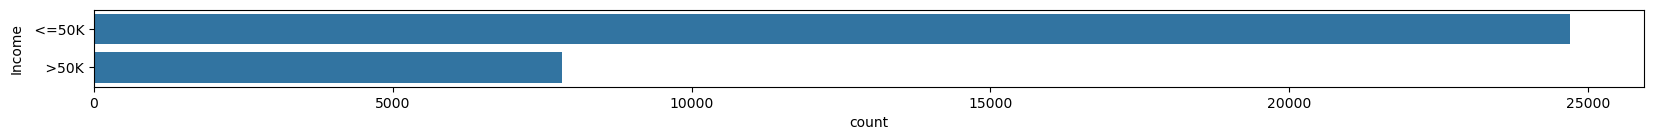

In [291]:
plt.figure(figsize=(20,1))
sns.countplot(y="Income", data=income)

Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed

## Box plot

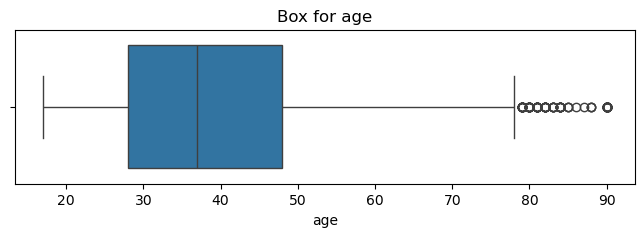

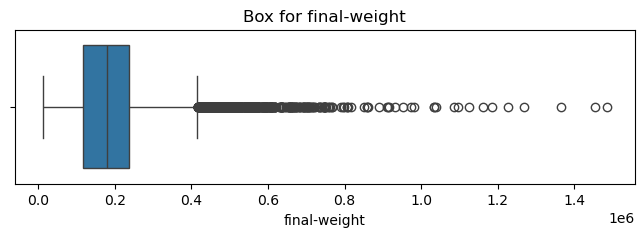

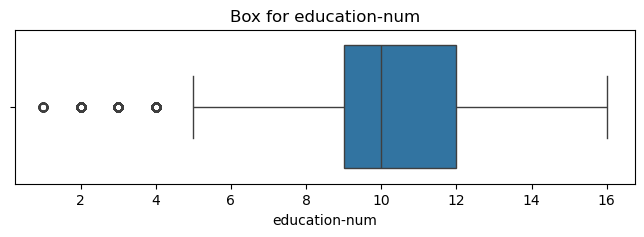

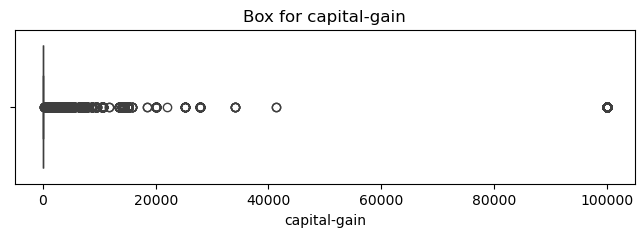

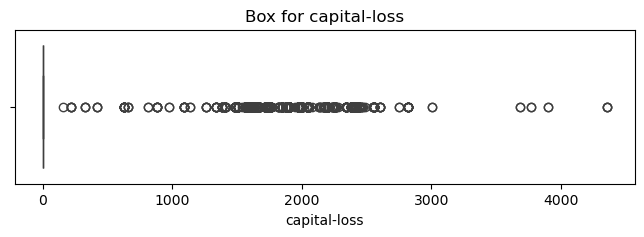

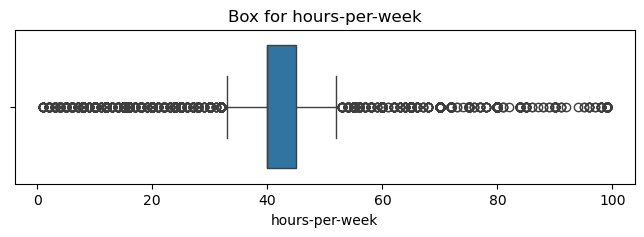

In [292]:
def check_outliers(df, column_name):
    plt.figure(figsize=(8, 2))
    sns.boxplot(x = df[column_name])
    plt.title(f"Box for {column_name}")
    plt.show()

col_to_check = numcols
for col in col_to_check:
    check_outliers(income, col)


- in case of age most of the individuals is of age between 30-50 but there individuals with age between 80-90 standing as outliers
- in case of years of education most of them are in range between 9-12 while there are outliers to 5
- for final-weight and hours per week only a few of them comes in a range with a number of outliers
- whereas in case of capital-loss and capital-gain there only outliers 

### Univariate analysis


Univariate analysis involves the analysis of a single variable. It is often defines as analyzing and
understanding the distribution, central tendency of a single variable from the dataset. It focuses on

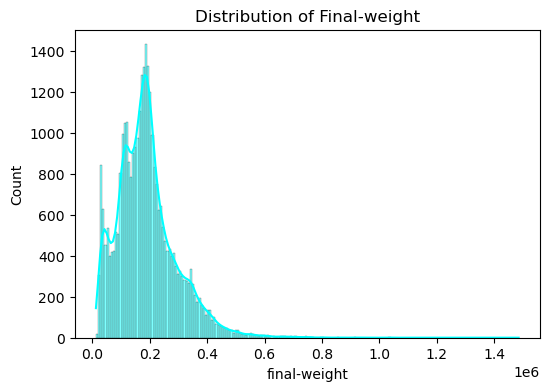

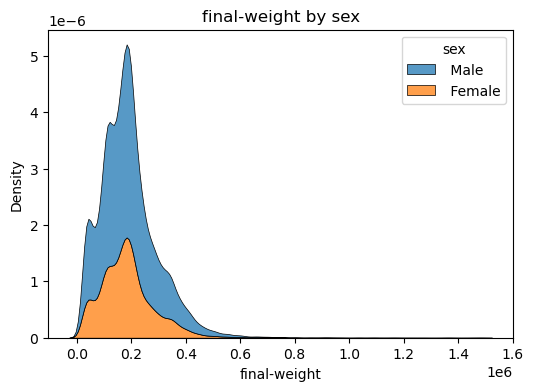

In [293]:
plt.figure(figsize=(6,4))
sns.histplot(data=income, x='final-weight', kde=True,color='aqua')
plt.title('Distribution of Final-weight')
plt.show();

plt.figure(figsize=(6,4))
sns.kdeplot(income, x='final-weight', hue='sex', multiple='stack',
             linewidth=0.5)
plt.title('final-weight by sex')
plt.show()

In [294]:
income['education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64

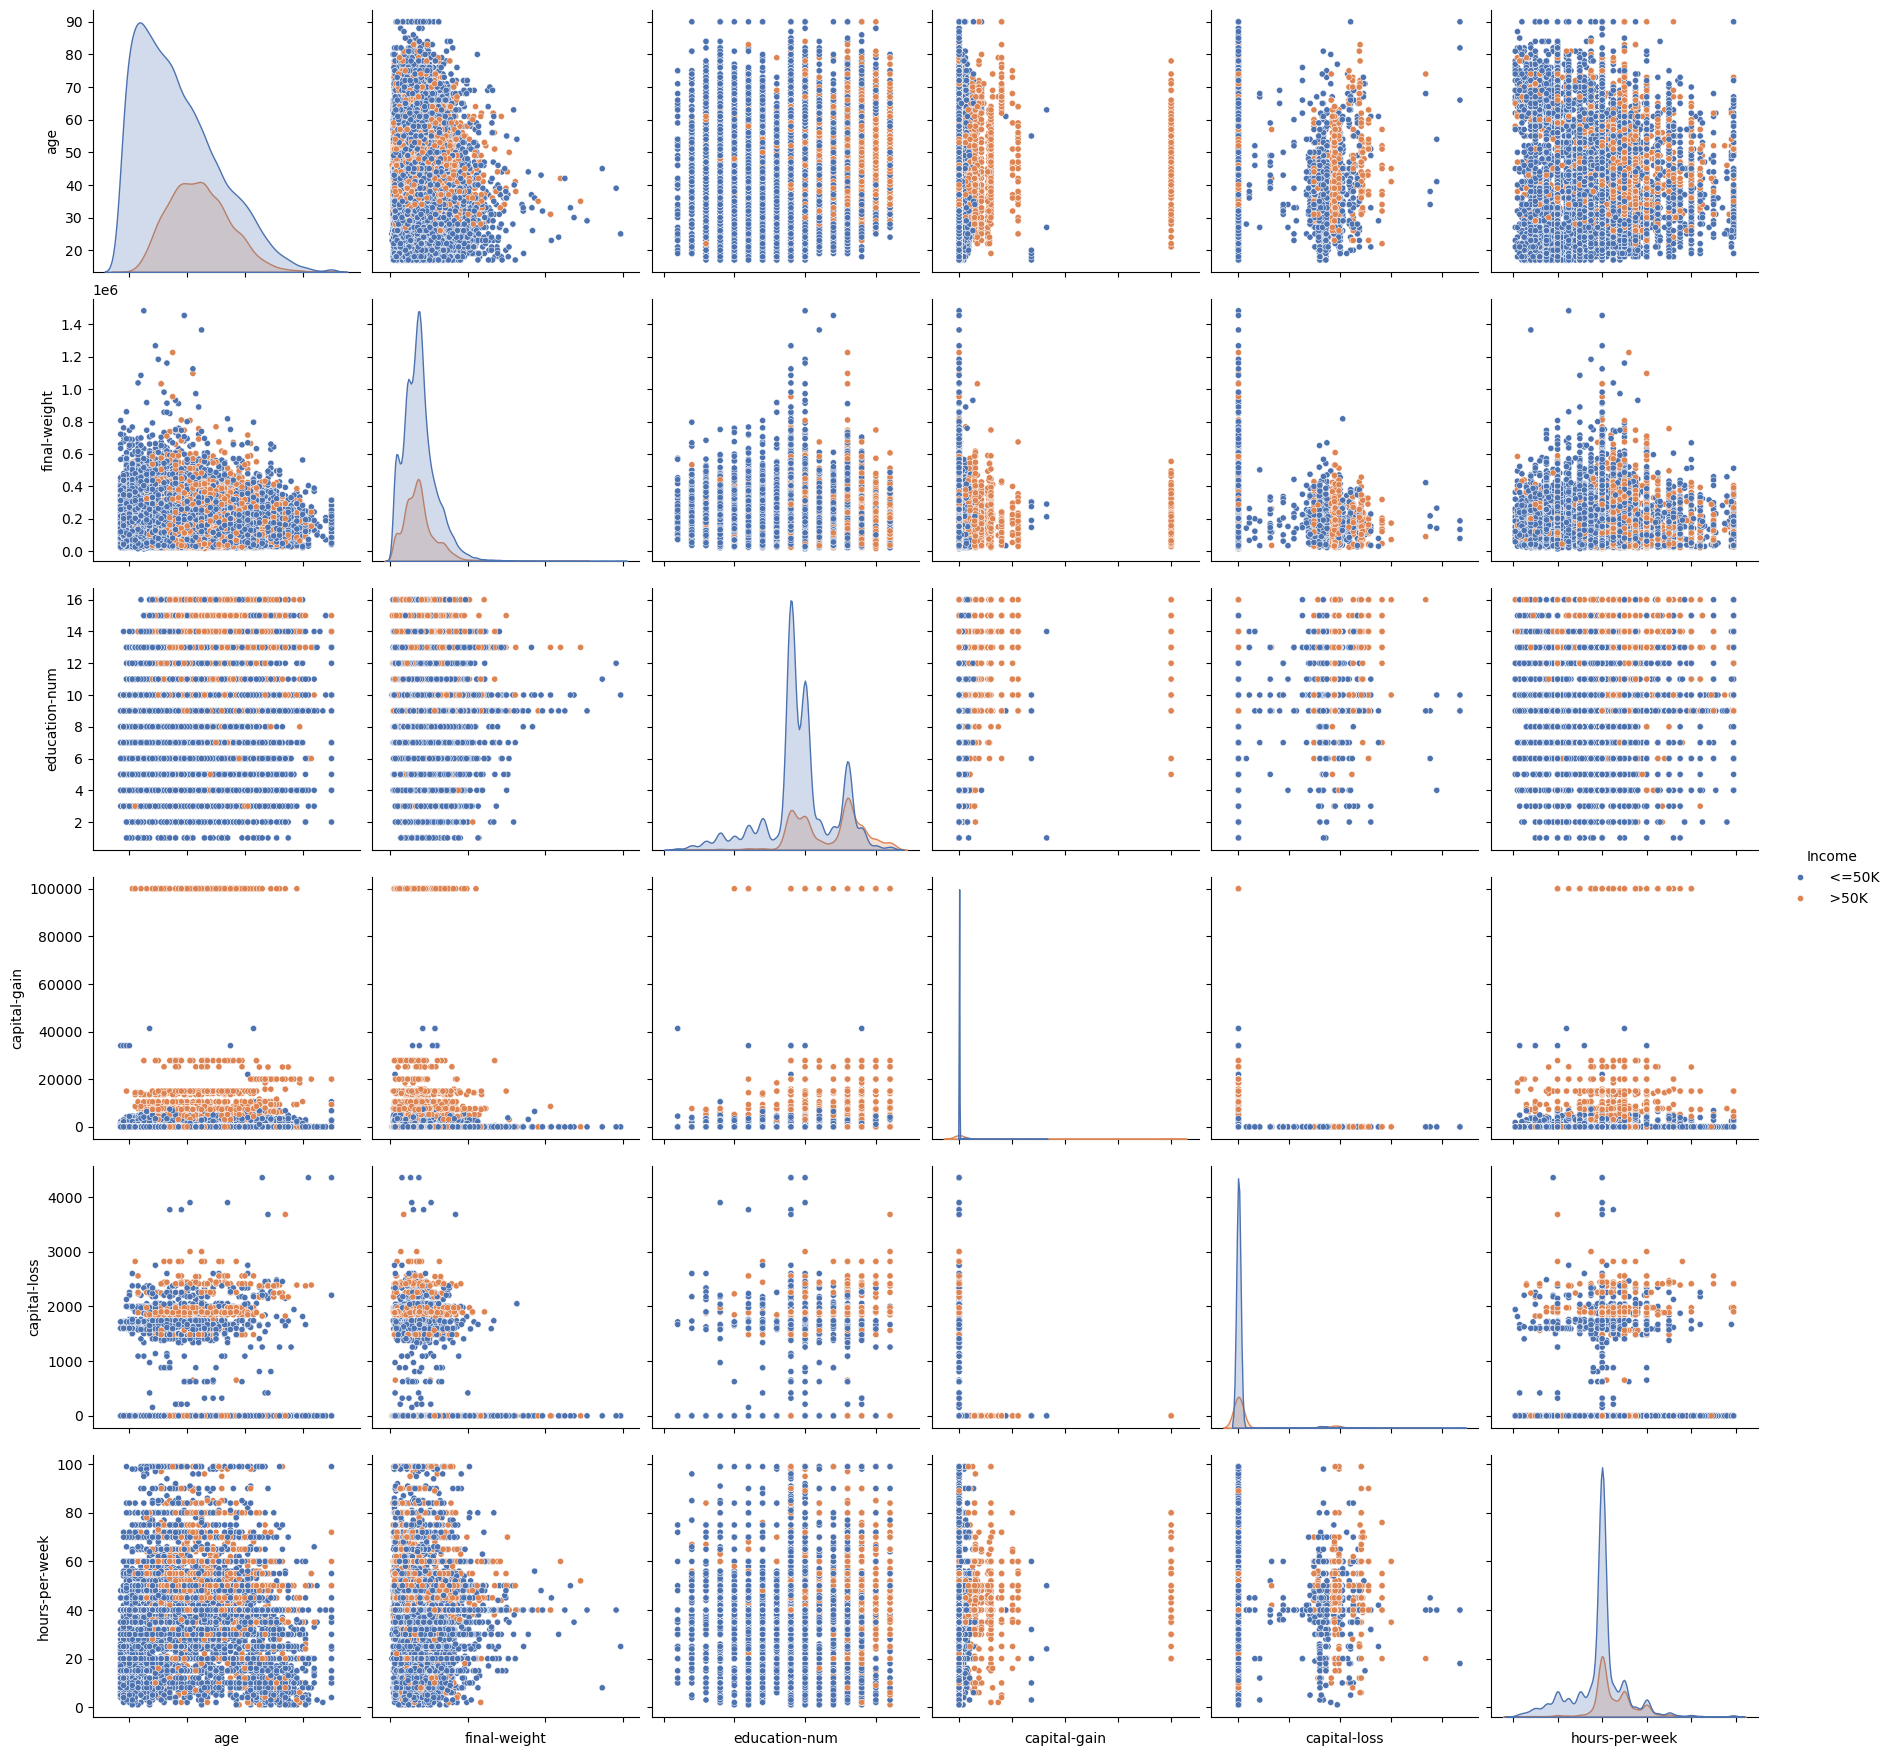

In [182]:
pp = sns.pairplot(income, hue = 'Income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

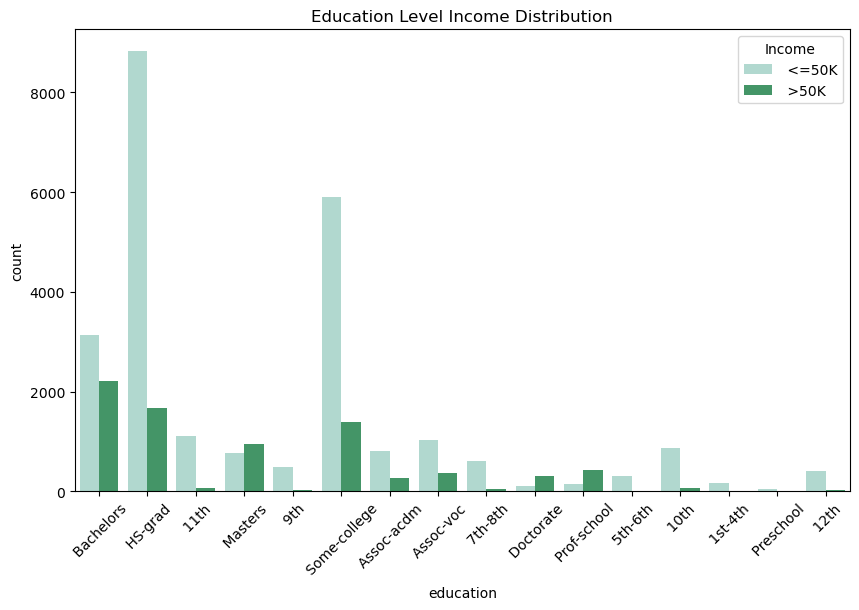

In [183]:
plt.figure(figsize=(10,6))
sns.countplot(x='education',data=income,palette='BuGn',hue='Income')
plt.xticks(rotation=45)
plt.title("Education Level Income Distribution")
plt.show()

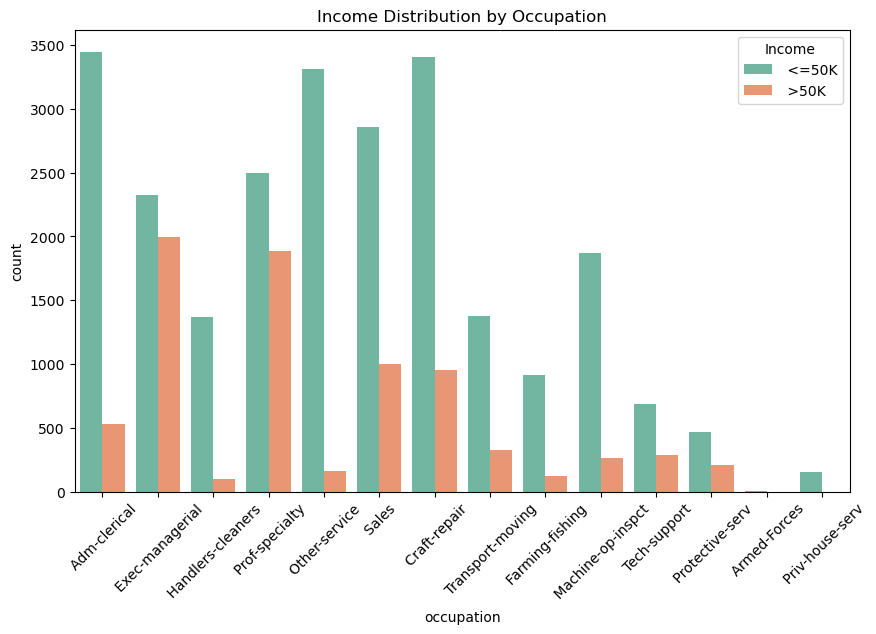

In [184]:
plt.figure(figsize=(10,6))
sns.countplot(x='occupation',data=income,palette='Set2',hue='Income')
plt.xticks(rotation=45)
plt.title("Income Distribution by Occupation")
plt.show()

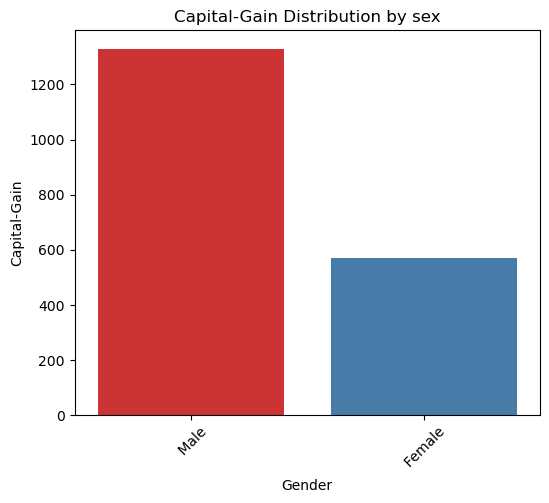

In [185]:
plt.figure(figsize=(6,5))
sns.barplot(data=income,x='sex',y='capital-gain',palette='Set1',errorbar=None)
plt.title('Capital-Gain Distribution by sex')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.ylabel('Capital-Gain')
plt.show()

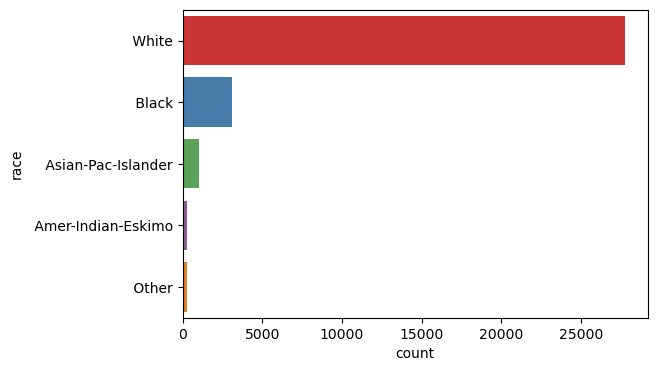

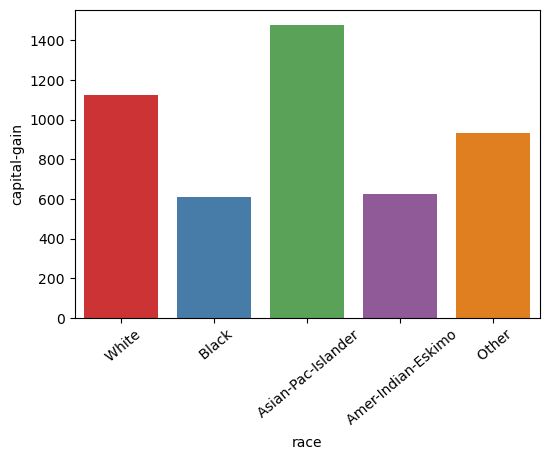

In [187]:
plt.figure(figsize=(6,4))
sns.countplot(income['race'],palette='Set1')

plt.figure(figsize=(6,4))
sns.barplot(data=income,x='race',y='capital-gain',errorbar=None,palette='Set1')
plt.xticks(rotation=40)
plt.show()

In [188]:
income['marital-status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

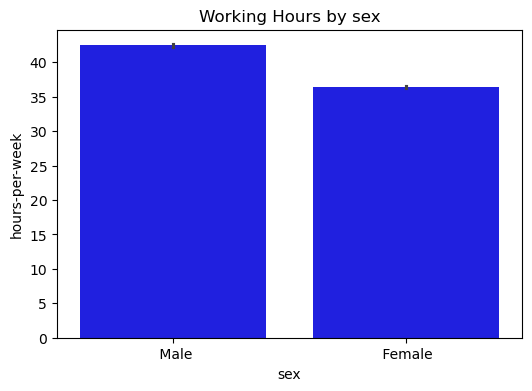

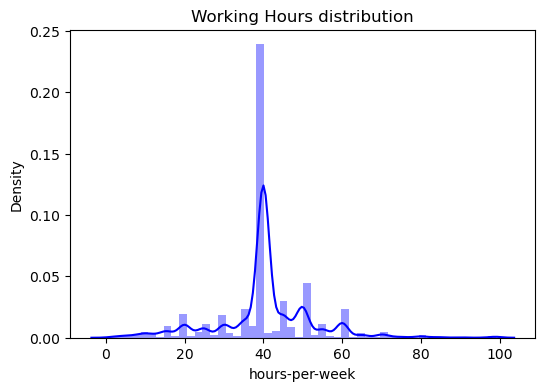

In [189]:
plt.figure(figsize=(6,4))
sns.barplot(data=income,x='sex',y='hours-per-week',color='blue') 
plt.title('Working Hours by sex')
plt.show()

plt.figure(figsize=(6,4))
sns.distplot(income['hours-per-week'],color='blue')
plt.title('Working Hours distribution')
plt.show()

In [295]:
income.corr()

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
final-weight,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours-per-week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


<Axes: >

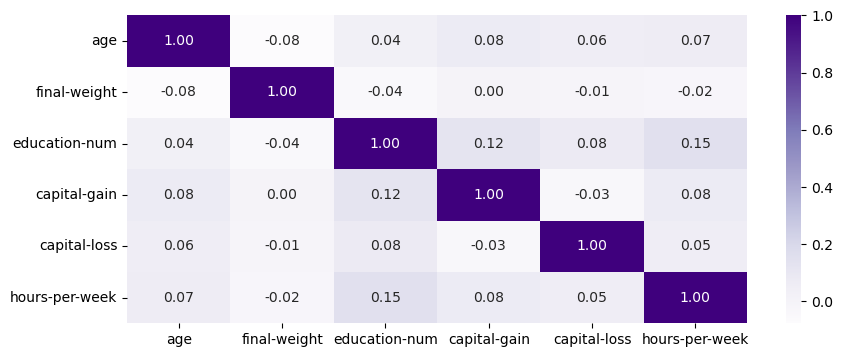

In [323]:
plt.figure(figsize=(10,4))
sns.heatmap(income.corr(),cmap='Purples',annot=True,fmt='.2f')

- The correlation heatmap shows there aren't any higly positive relation among the features but we can see that education-num and hours-per-week are showing .15 positively realated while comparing with others  

In [190]:
# Removing Unwanted Feature
income.drop('final-weight',axis=1,inplace=True)

- Final weight helps adjust the overall statistics but doesn't change the income level of either individual.

#### Saving the cleaned data

In [191]:
income.to_csv('C:/Users/User/Desktop/DATA/power bi/data/incomevis.csv')

### Observation
- a big perecent of male hold the income than females
- it is found that more than female, males are in the working field
- when comparing with the racial distribution, white people holds the most of the income and it is clear that most of the data is shared from the United-states and all
- Thus human bias like gender and race still gives such result
- However Capital is hold by the asian as we know asia provide a big opportunity to their people with a great allowances and more...
- those with High-grade education have the greate percentage of income less than or equal to 50K 
- and those with Bachelors education have the greate percentage of income greater than 50K
- But those with Prof-school, Doctrate,Masters have large number of income with greater than 50K compared to less than 50k in which only a small amount of the individuals are educated to this level


### Convereting Target variable to Binary

In [192]:
income['Income']=income['Income'].apply(lambda x: 0 if x == ' <=50K' else 1)

 Converting variable will be better in case of Logistic Regression and in case of decision tree
 it is not important 

In [193]:
income['Income'].unique()
# converted '<=50K' to 0 and '>50K' to 1

array([0, 1], dtype=int64)

#### Seperating Target from the data for training and testing

In [194]:
X=income.drop(['Income'],axis=1)

y=income['Income']

- X represent the independent features and y is the target feature

## Label Encoding

In [195]:
from sklearn.preprocessing import LabelEncoder
# importing the Label Encoder from sklearn

In [196]:
LE=LabelEncoder()
# label encoder is used to encode the data values to numerical

In [197]:
catcols

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [198]:
for col in catcols:
    X[col]=LE.fit_transform(X[col].values)

In [199]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,9,13,2,3,0,4,1,0,0,13,38
2,38,3,11,9,0,5,1,4,1,0,0,40,38
3,53,3,1,7,2,5,0,2,1,0,0,40,38
4,28,3,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,7,12,2,12,5,4,0,0,0,38,38
32557,40,3,11,9,2,6,0,4,1,0,0,40,38
32558,58,3,11,9,6,0,4,4,0,0,0,40,38
32559,22,3,11,9,4,0,3,4,1,0,0,20,38


- encoded every data to numerical

### Handling Imbalanced Target

In [200]:
income['Income'].value_counts()

0    24698
1     7839
Name: Income, dtype: int64

- as the value count says the data is not balanced as it contains a big difference in both the values 

In [201]:
from imblearn.over_sampling import SMOTE
#Synthetic Minority Oversampling Technique (SMOTE) used to generates synthetic data for the minority class.

In [202]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X.iloc[:,0:-1], income['Income'])

print('Original dataset shape', len(X))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 32537
Resampled dataset shape 49396


#### Train Test Split

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train,X_test,y_train,y_test=train_test_split(x_smote, y_smote,test_size=0.3,random_state=11)
# splitting with 30% of the original data for testing and the rest 70% for Training

# Model Creation & Evaluation

### Income Classification Models: KNN, Decision Tree, Logistic Regression..

- This section explores three popular machine learning algorithms for income classification: K-Nearest Neighbors (KNN), Decision Tree, and Logistic Regression. We will implement and evaluate each model to determine the best approach for predicting income brackets based on our income dataset.ts.

-  **Logistic Regression**  
Logistic Regression is a linear model that predicts the probability of an event(income classification) based on a set of independent variables.  
<u>Model by Pipeline</u>: we will analyse the model created using pipeline where standard scaler and logistic regression is implemented 

- **Decision Tree**
Decision Trees are tree-like models that classify data points by asking a series of questions about their features.  
<u>Decision tree complexity</u>: We will investigate the impact of tree depth and pruning techniques on model performance and interpretability.

1. **K-Nearest Neighbors (KNN)**
KNN is a non-parametric, lazy learning algorithm. It classifies a new data point based on the majority vote of its k nearest neighbors in the training data.  
<u>Hyperparametric tuning</u>: We will experiment the tuning of parameters of KNN and find out which yields the best performance for our KNN model and create model with that parameters for analysis.

**Evaluation:** 
We will evaluate the performance of each model usinAccuracy score and AUC-ROC Score and Graphre. This will help us identify the model thaperform best in Income predictionet.

### Using Logistic Regression

In [205]:
from sklearn.pipeline import Pipeline
# pipeline is to be created in which it contains both Standard Scaler and Logistic Regression
from sklearn.preprocessing import StandardScaler
# Standard scaler is to scale the values within a range
from sklearn.linear_model import LogisticRegression

### Pipeline 

In [206]:
regression_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('regressor',LogisticRegression())

])

In [207]:
regression_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LogisticRegression())])

- model is created with Pipeline where data will scaled and logistic regression is performed on it

In [208]:
regression_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LogisticRegression())])

In [209]:
y_pred= regression_pipeline.predict(X_test)
# prediction variable

In [210]:
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [211]:
y_prob = regression_pipeline.predict_proba(X_test)[:, 1]

-To get the predicted probabilities belonging to each class in which [:, 1] indexing is used to extract the probabilities for the positive class.

### Accuracy and ROC_AUC Score

 ROC-AUC Score is a scalar value that summarizes the performance of a classification model.

In [212]:
from sklearn.metrics import accuracy_score,roc_auc_score, roc_curve, auc

In [213]:
acc = accuracy_score(y_test,y_pred)

In [214]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_curve = auc(fpr, tpr)

In [215]:
roc_auc = roc_auc_score(y_test, y_prob)

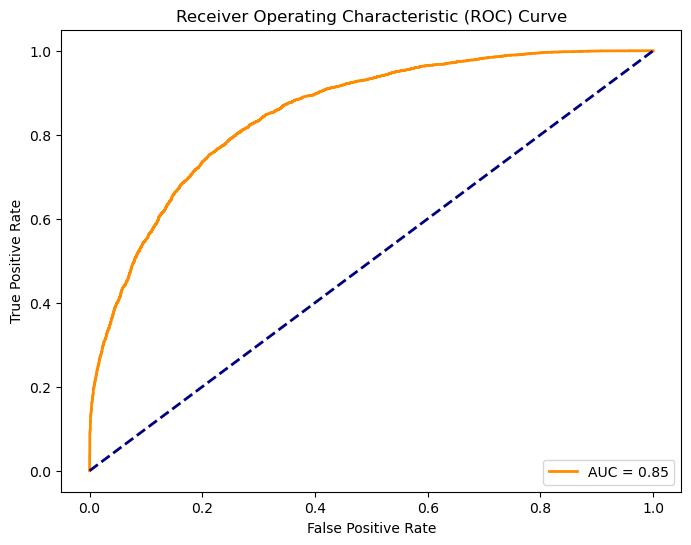

In [216]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_curve:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [217]:
print(f'Accuracy is {acc:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy is 0.77
ROC-AUC: 0.85


## Using Decision Tree

In [218]:
from sklearn.tree import DecisionTreeClassifier
incometree=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [219]:
incometree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [220]:
incometree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

- Model is created using decision tree 

## Plotting the Tree

In [221]:
from sklearn.tree import plot_tree

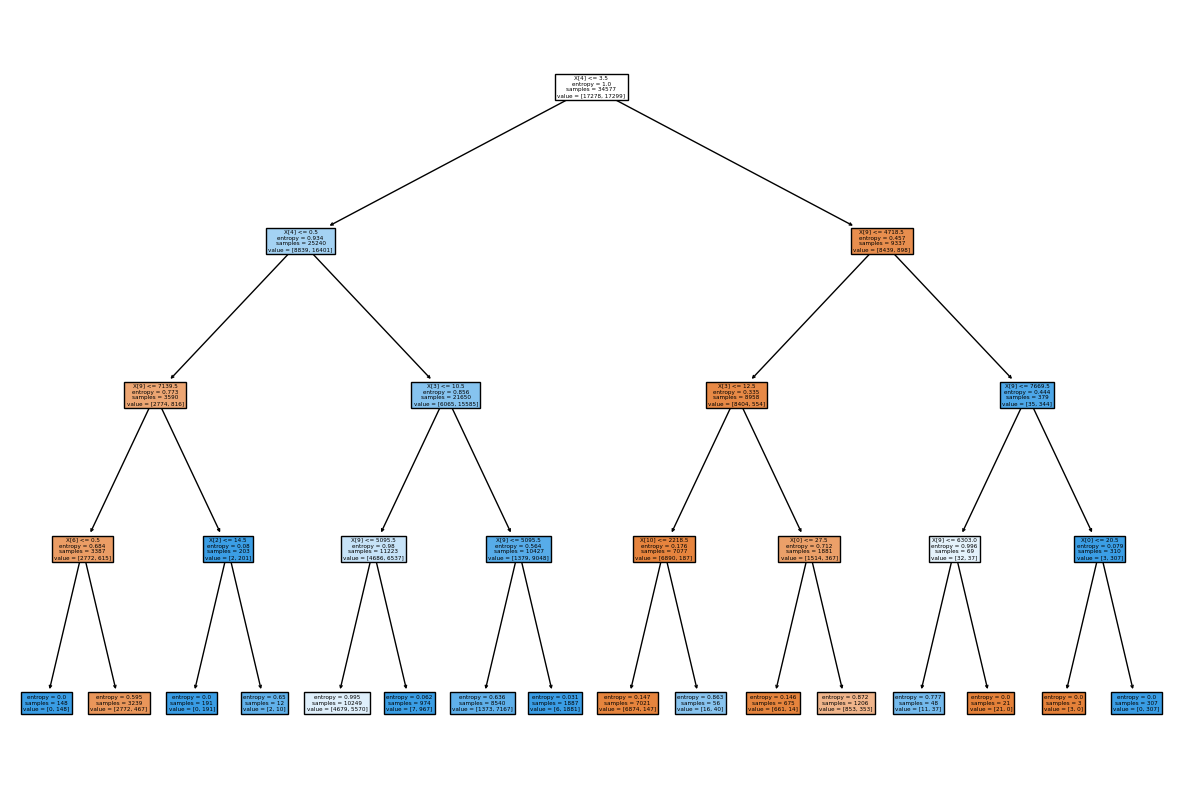

In [222]:
plt.figure(figsize=(15,10))
plot_tree(incometree,filled=True)
plt.show()

In [223]:
predictree=incometree.predict(X_test)
# prediction is made

In [224]:
predictree

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [225]:
y_probtree = incometree.predict_proba(X_test)[:, 1]

#### Accuracy and ROC-AUC

In [226]:
fprdt, tprdt, _dt = roc_curve(y_test, y_probtree)
roc_auc_curve = auc(fprdt, tprdt)

In [227]:
ROCTree = roc_auc_score(y_test, y_probtree)

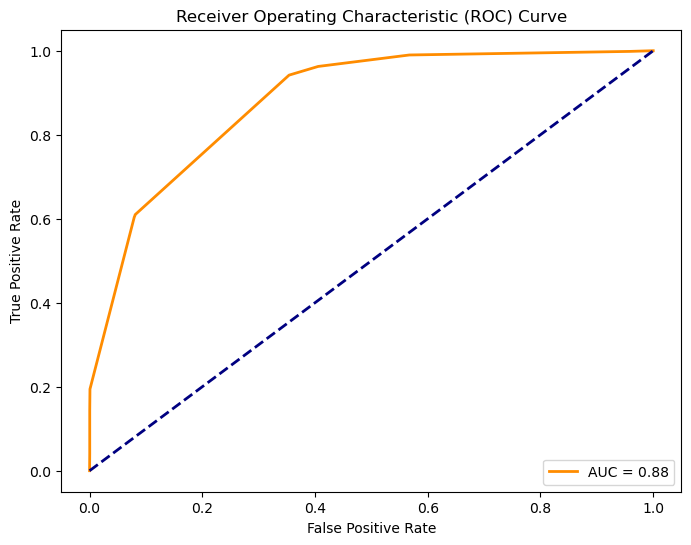

In [228]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fprdt, tprdt, color='darkorange', lw=2, label=f'AUC = {roc_auc_curve:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [229]:
print(f'Accuracy is {accuracy_score(y_test,predictree):.2f}')
print(f'ROC-AUC: {ROCTree:.2f}')

Accuracy is 0.79
ROC-AUC: 0.88


## Using K-Nearest Neighbor

### Hyperparametric tuning

In [230]:
from sklearn.model_selection import GridSearchCV

In [231]:
from sklearn.neighbors import KNeighborsClassifier

In [232]:
knn = KNeighborsClassifier()

In [233]:
parameters={'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', ' manhattan', 'cosine'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']}

In [234]:
income_grid=GridSearchCV(knn,parameters,cv=3)

In [235]:
income_grid.fit(X,y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'metric': ['euclidean', ' manhattan', 'cosine'],
                         'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [236]:
income_grid.cv_results_

{'mean_fit_time': array([0.13187043, 0.15845076, 0.11723646, 0.1481173 , 0.13954878,
        0.12902411, 0.15694769, 0.13267605, 0.13605189, 0.13596074,
        0.12851604, 0.13475553, 0.14031323, 0.17923435, 0.11385902,
        0.11532569, 0.10973875, 0.16034532, 0.14393727, 0.12018331,
        0.1219341 , 0.13054593, 0.1149381 , 0.1197621 , 0.13981883,
        0.11551833, 0.11496154, 0.12260739, 0.10936626, 0.1201601 ,
        0.13951357, 0.10972953, 0.1095562 , 0.1215237 , 0.11541112,
        0.12532854, 0.12522467, 0.11450251, 0.        , 0.00520849,
        0.01041317, 0.00520706, 0.01041381, 0.00520595, 0.00520889,
        0.01041381, 0.00520643, 0.0052077 , 0.01041555, 0.00520595,
        0.01041436, 0.00034451, 0.01041381, 0.00662788, 0.01043105,
        0.00520809, 0.0003442 , 0.01041277, 0.00520905, 0.01094095,
        0.00522415, 0.01041444, 0.00034515, 0.01047889, 0.00520682,
        0.01041373, 0.00520674, 0.01041579, 0.00555015, 0.00520611,
        0.0052077 , 0.01041404,

In [237]:
best_comb= income_grid.best_params_

In [238]:
best_comb

{'algorithm': 'ball_tree',
 'metric': 'euclidean',
 'n_neighbors': 14,
 'weights': 'uniform'}

In [239]:
acc=income_grid.best_score_

In [240]:
acc

0.8456219902021288

In [241]:
results=pd.DataFrame(income_grid.cv_results_)

In [242]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.131870,0.009009,2.641138,0.147003,auto,euclidean,1,uniform,"{'algorithm': 'auto', 'metric': 'euclidean', '...",0.815785,0.807394,0.812264,0.811814,0.003440,143
1,0.158451,0.048532,1.760371,0.306411,auto,euclidean,1,distance,"{'algorithm': 'auto', 'metric': 'euclidean', '...",0.815785,0.807394,0.812264,0.811814,0.003440,143
2,0.117236,0.008983,2.027606,0.003289,auto,euclidean,2,uniform,"{'algorithm': 'auto', 'metric': 'euclidean', '...",0.836991,0.835054,0.840664,0.837570,0.002326,92
3,0.148117,0.027947,1.518550,0.015809,auto,euclidean,2,distance,"{'algorithm': 'auto', 'metric': 'euclidean', '...",0.820948,0.816891,0.821946,0.819928,0.002186,137
4,0.139549,0.030356,2.022098,0.034839,auto,euclidean,3,uniform,"{'algorithm': 'auto', 'metric': 'euclidean', '...",0.835608,0.830629,0.833933,0.833390,0.002069,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,0.010431,0.007376,0.000000,0.000000,kd_tree,cosine,17,distance,"{'algorithm': 'kd_tree', 'metric': 'cosine', '...",NaN,NaN,NaN,NaN,NaN,173
338,0.005600,0.007920,0.000000,0.000000,kd_tree,cosine,18,uniform,"{'algorithm': 'kd_tree', 'metric': 'cosine', '...",NaN,NaN,NaN,NaN,NaN,172
339,0.000000,0.000000,0.000000,0.000000,kd_tree,cosine,18,distance,"{'algorithm': 'kd_tree', 'metric': 'cosine', '...",NaN,NaN,NaN,NaN,NaN,171
340,0.010414,0.007364,0.000000,0.000000,kd_tree,cosine,19,uniform,"{'algorithm': 'kd_tree', 'metric': 'cosine', '...",NaN,NaN,NaN,NaN,NaN,286


In [243]:
res_df= results[['param_algorithm','param_metric','param_n_neighbors','param_weights']]

In [244]:
res_df

,param_algorithm,param_metric,param_n_neighbors,param_weights
0,auto,euclidean,1,uniform
1,auto,euclidean,1,distance
2,auto,euclidean,2,uniform
3,auto,euclidean,2,distance
4,auto,euclidean,3,uniform
...,...,...,...,...
337,kd_tree,cosine,17,distance
338,kd_tree,cosine,18,uniform
339,kd_tree,cosine,18,distance
340,kd_tree,cosine,19,uniform


In [245]:
kNN=KNeighborsClassifier(algorithm= 'auto',
 metric= 'cosine',
 n_neighbors= 16,
 weights= 'uniform')

In [246]:
kNN

KNeighborsClassifier(metric='cosine', n_neighbors=16)

In [247]:
kNN.fit(X_train,y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=16)

In [331]:
KNN_pred= kNN.predict(X_test)

In [333]:
KNN_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [334]:
acc=accuracy_score(y_test,KNN_pred)

In [335]:
# Calculate ROC AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred)

In [336]:
roc_auc = auc(fpr, tpr)

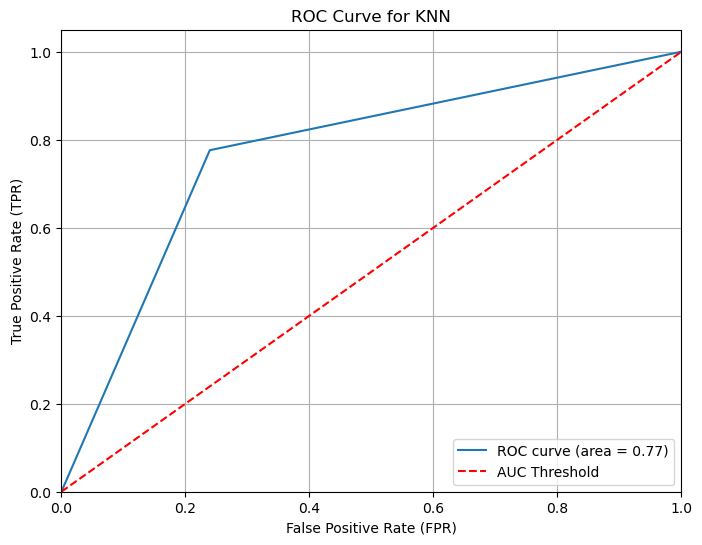

In [337]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='AUC Threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [338]:
acc

0.8211755179161887

In [339]:
print("AUC-ROC Score:",format(roc_auc, ".2f"))
print("Accruracy :",format(acc,'.2f'))

AUC-ROC Score: 0.77
Accruracy : 0.82


## <u>**Conclusion**</u>

#### In conclusion, the IncomeVista Visionary , framed as a classification problem, employed machine learning models to effectively categorize individuals into different income groups based on historical data patterns
#### The accuracy of the model is 77% in logistic regression, Pipeline is used to create the model in which thedata set in pipeline get passed to standard scaler and then the Logistic regression is performed
#### In case of Decition tree, 79% accurate with an ROC-AUC score of 88%. Plotted the tree with 4 level and it is found that it used Martial_status (X[5]) as the root node
#### Hyperparametric tuning performed in model using K-Nearest Neighbor, in which the parametrics with best score are taken and performed the model with accuracy of 82% and AUC-ROC score of 77
#### The KNN model demonstrated the strongest ability to learn from existing data and make accurate predictions for unseen cases. However, it's important to consider that all three models achieved accuracies around 80%, suggesting there's still room for improvement.